In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio
import warnings


import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint




warnings.filterwarnings("ignore")

In [ ]:
# Paths for data.
Cremad = "/content/drive/MyDrive/Colab Notebooks/crema"
Ravdess = "/content/drive/MyDrive/Colab Notebooks/ravdess"
Savee = "/content/drive/MyDrive/Colab Notebooks/savee"

In [ ]:
crema_dir = os.listdir(Cremad)

emotions = []
paths = []

for file in crema_dir:
    # storing file paths
    paths.append(Cremad+"/" + file)
    # storing file emotions
    part=file.split('_')
    emotions.append(part[2])

#  Creating dataframe out of lists
emotion_df = pd.DataFrame(emotions, columns=['Emotions'])
path_df = pd.DataFrame(paths, columns=['Path'])


Crema_df = pd.concat([emotion_df, path_df], axis=1)

e_dict={'DIS':'disgusted', 'HAP':'happy', 'SAD':'sad', 'FEA':'fear', 'ANG':'angry', 'NEU':'neutral'}
Crema_df["Emotions"]=Crema_df["Emotions"].apply(lambda x : e_dict[x])

del emotion_df
del path_df

Crema_df.head()

Emotions                                               Path
0  disgusted  /content/drive/MyDrive/Colab Notebooks/crema/1...
1  disgusted  /content/drive/MyDrive/Colab Notebooks/crema/1...
2      angry  /content/drive/MyDrive/Colab Notebooks/crema/1...
3    neutral  /content/drive/MyDrive/Colab Notebooks/crema/1...
4  disgusted  /content/drive/MyDrive/Colab Notebooks/crema/1...

In [ ]:
Crema_df["Emotions"].value_counts()

disgusted    1271
angry        1271
sad          1271
fear         1271
happy        1271
neutral      1087
Name: Emotions, dtype: int64

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []

file_path = []
for i in ravdess_directory_list:
    actor = os.listdir(Ravdess +"/"+ i)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file is emotion
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess+"/" + i + '/' + file)

# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# int to emotion
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgusted', 8:'surprised'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0      sad  /content/drive/MyDrive/Colab Notebooks/ravdess...
1     calm  /content/drive/MyDrive/Colab Notebooks/ravdess...
2  neutral  /content/drive/MyDrive/Colab Notebooks/ravdess...
3    angry  /content/drive/MyDrive/Colab Notebooks/ravdess...
4     calm  /content/drive/MyDrive/Colab Notebooks/ravdess...

In [ ]:
Ravdess_df["Emotions"].value_counts()

sad          192
calm         192
angry        192
fear         192
happy        192
surprised    192
disgusted    192
neutral       96
Name: Emotions, dtype: int64

In [ ]:
# used "next" with "walk" cause "os.listdir" gives error
directory_list = next(os.walk("/content/drive/MyDrive/Colab Notebooks/savee"))[1]
file_emotion = []

file_path = []
for i in directory_list:
    actor = os.listdir(Savee +"/"+ i)
    for file in actor:
        file_emotion.append(file[:-6])
        file_path.append(Savee+"/" + i + '/' + file)

# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# letter to full emotion
Savee_df.Emotions.replace({'a':'angry', 'd':'disgusted', 'f':'fear', 'h':'happy', 'n':'neutral', 'sa':'sad' , 'su':'surprised'}, inplace=True)
Savee_df.head()

Emotions                                               Path
0      happy  /content/drive/MyDrive/Colab Notebooks/savee/K...
1  disgusted  /content/drive/MyDrive/Colab Notebooks/savee/K...
2  disgusted  /content/drive/MyDrive/Colab Notebooks/savee/K...
3       fear  /content/drive/MyDrive/Colab Notebooks/savee/K...
4      angry  /content/drive/MyDrive/Colab Notebooks/savee/K...

In [ ]:
# creating Dataframe using above 3 dataframes.
df = pd.concat([Ravdess_df, Crema_df, Savee_df], axis = 0)
df.to_csv("data.csv",index=False)
df.head()

Emotions                                               Path
0      sad  /content/drive/MyDrive/Colab Notebooks/ravdess...
1     calm  /content/drive/MyDrive/Colab Notebooks/ravdess...
2  neutral  /content/drive/MyDrive/Colab Notebooks/ravdess...
3    angry  /content/drive/MyDrive/Colab Notebooks/ravdess...
4     calm  /content/drive/MyDrive/Colab Notebooks/ravdess...

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df["Emotions"].value_counts()

sad          1523
angry        1523
fear         1523
happy        1523
disgusted    1523
neutral      1303
surprised     252
calm          192
Name: Emotions, dtype: int64

Text(0.5, 1.0, 'Count of Emotions')

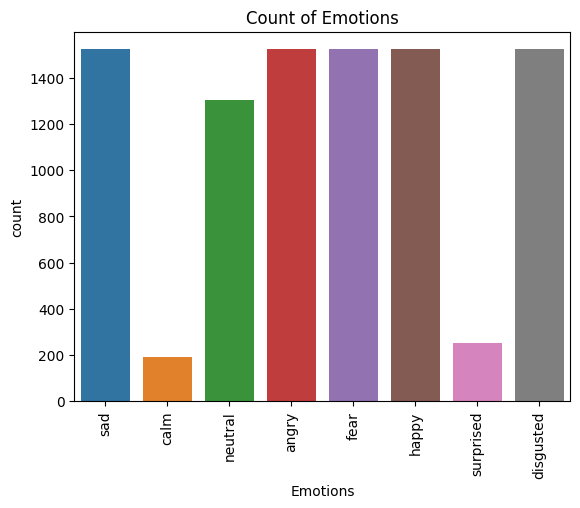

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks( rotation='vertical')
sns.countplot(data=df, x="Emotions")
plt.title("Count of Emotions")

In [ ]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

In [ ]:
emot=["disgusted","fear","sad","happy","angry","neutral","surprised","calm"]

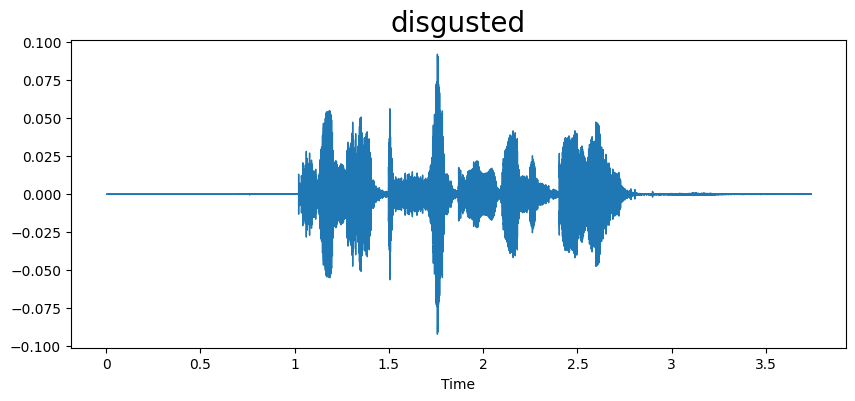

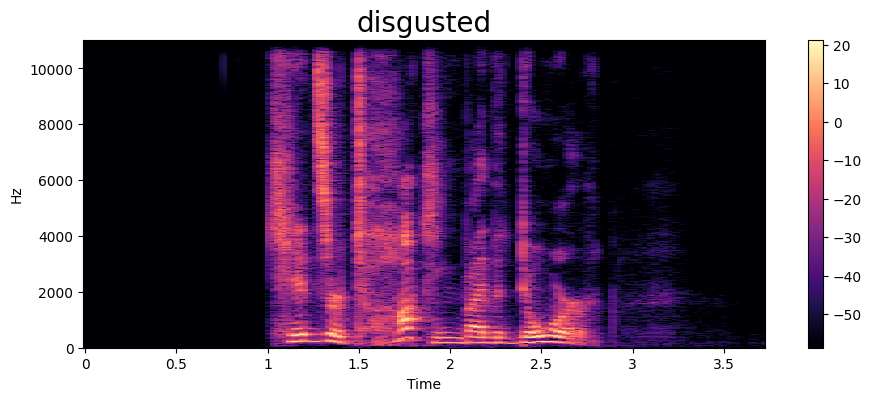

In [ ]:
# had to downgrade the numba verison so that its version matches with numpy and being compatible
emotion=emot[0]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion) #calling fuction of waveform
spectogram(data,sampling_rate,emotion) #calling function of spectrogram
Audio(path) #audio to hear in the output

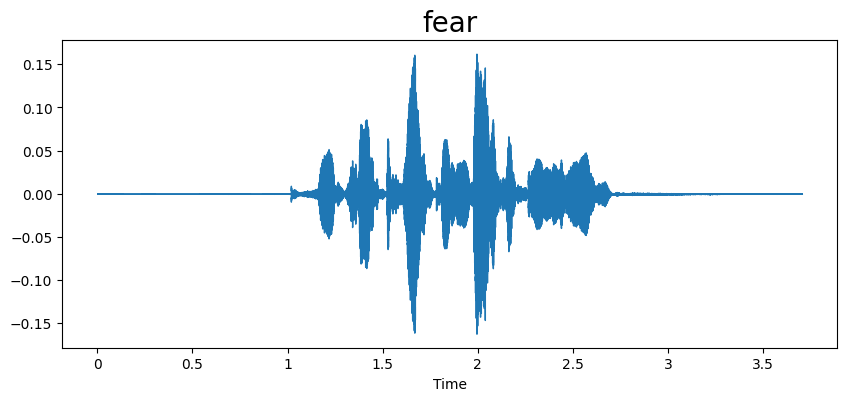

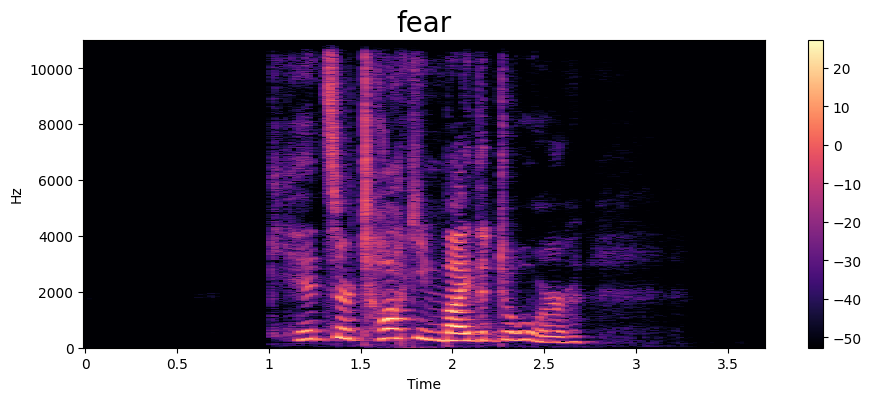

In [ ]:
emotion=emot[1]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

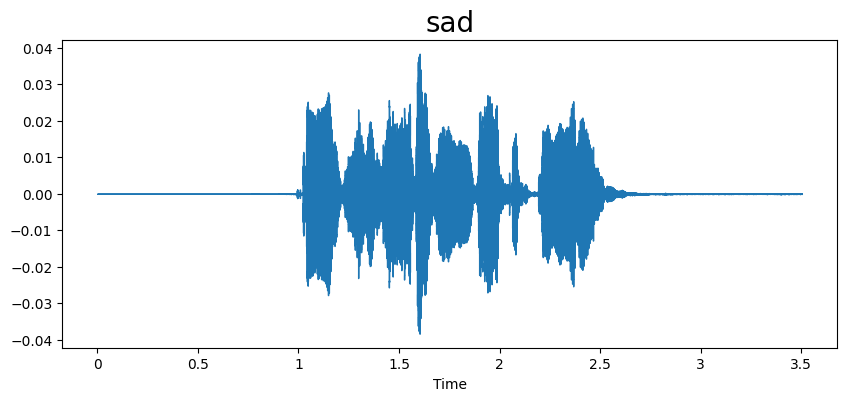

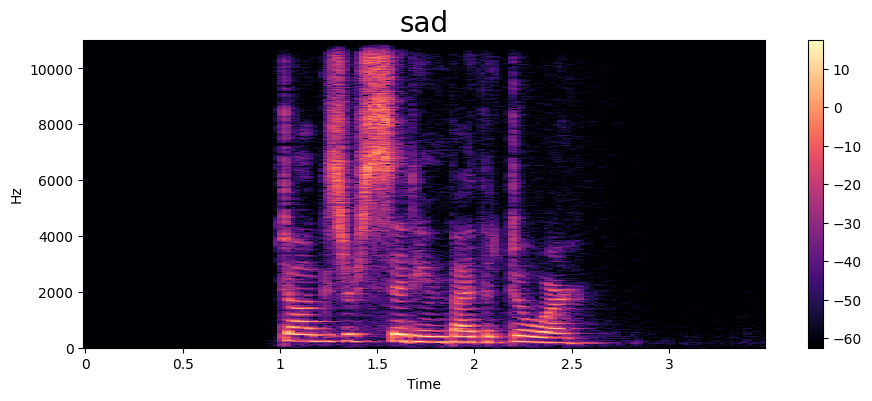

In [ ]:
emotion=emot[2]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

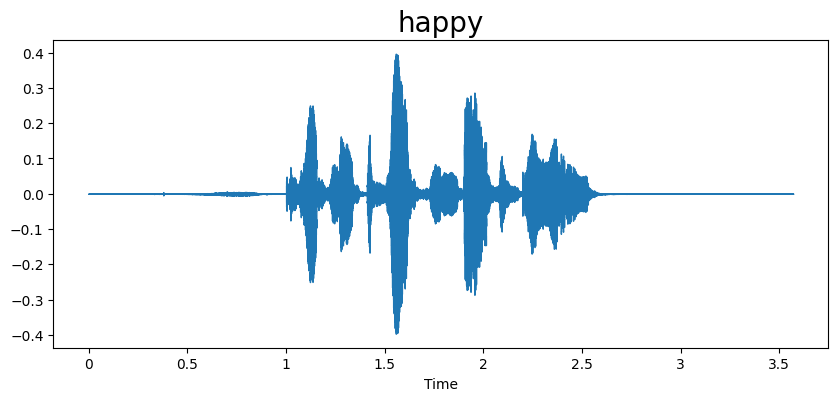

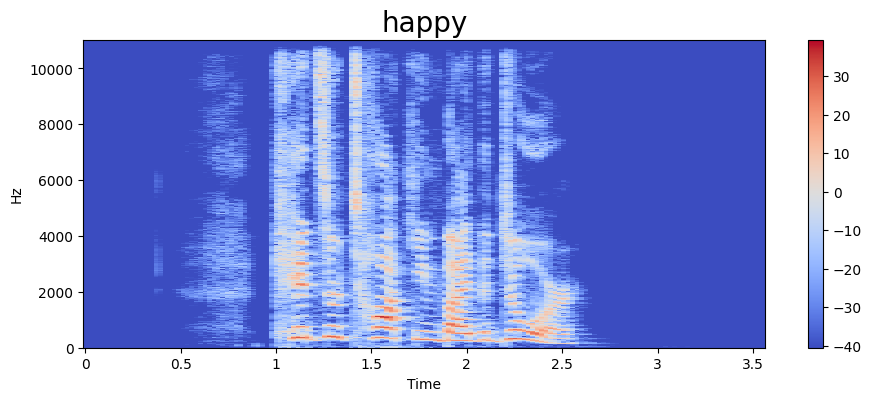

In [ ]:
emotion=emot[3]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

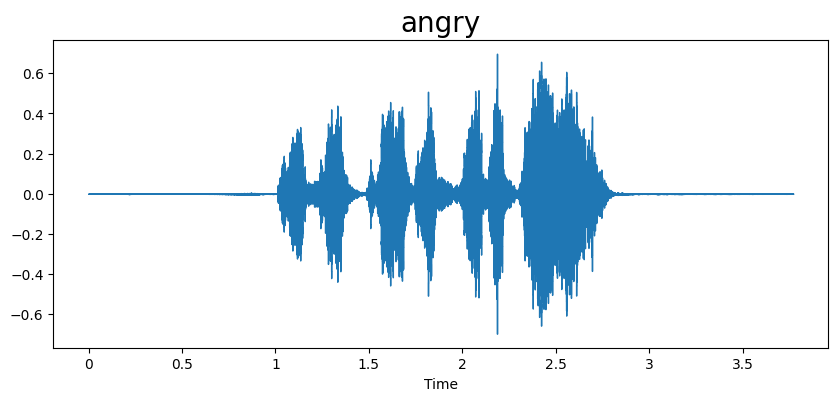

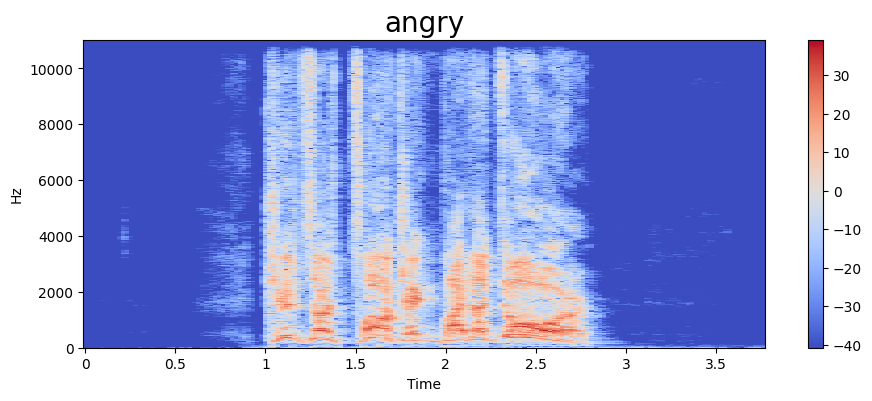

In [ ]:
emotion=emot[4]
path=np.array(df["Path"][df["Emotions"]==emotion])[100]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

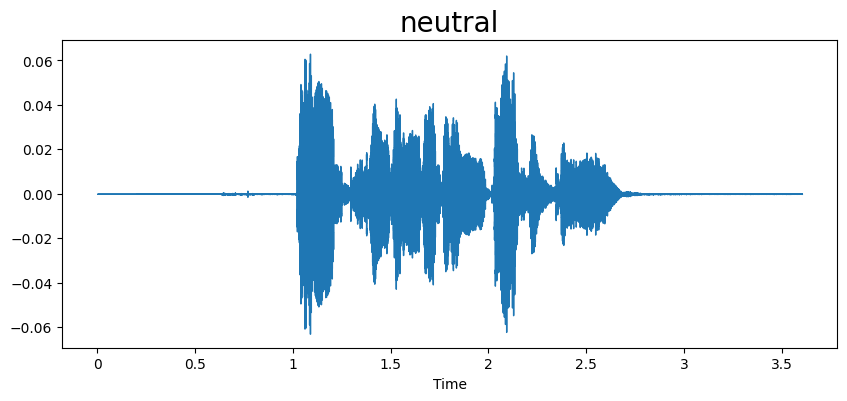

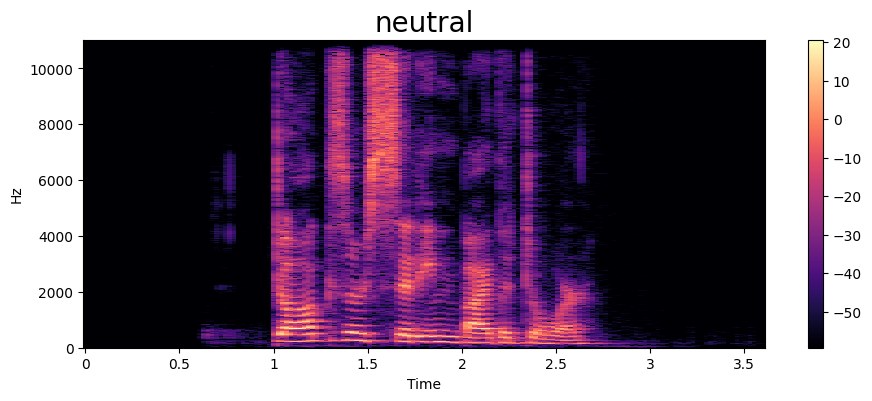

In [ ]:
emotion=emot[5]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

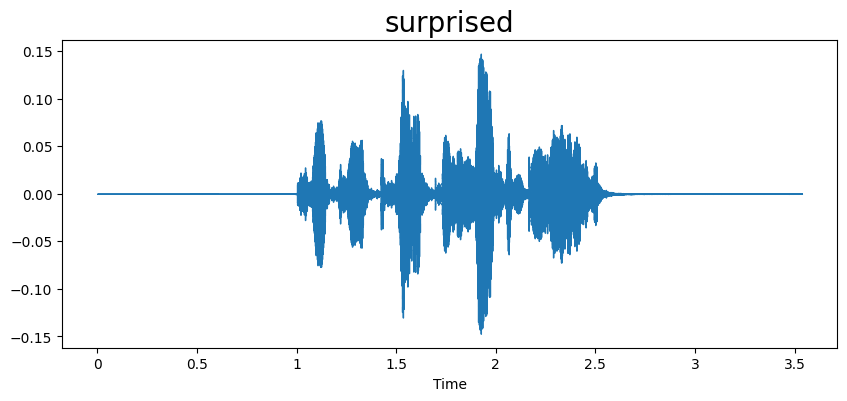

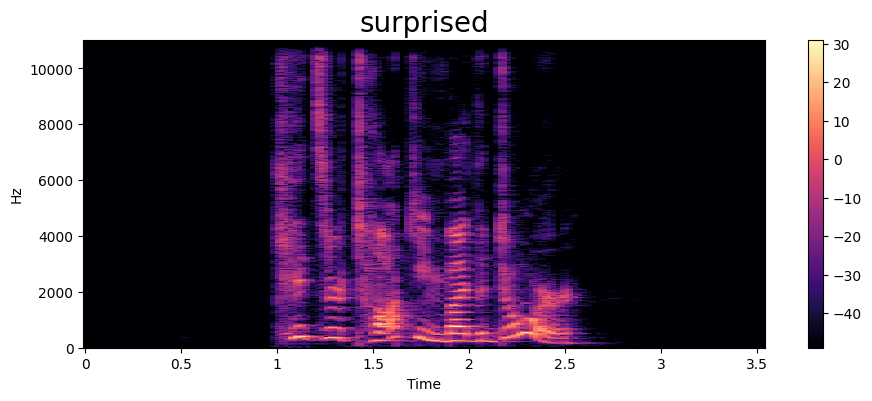

In [ ]:
emotion=emot[6]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

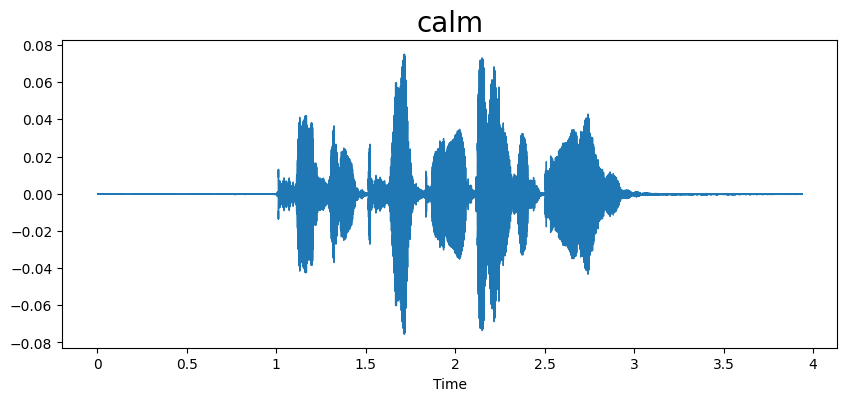

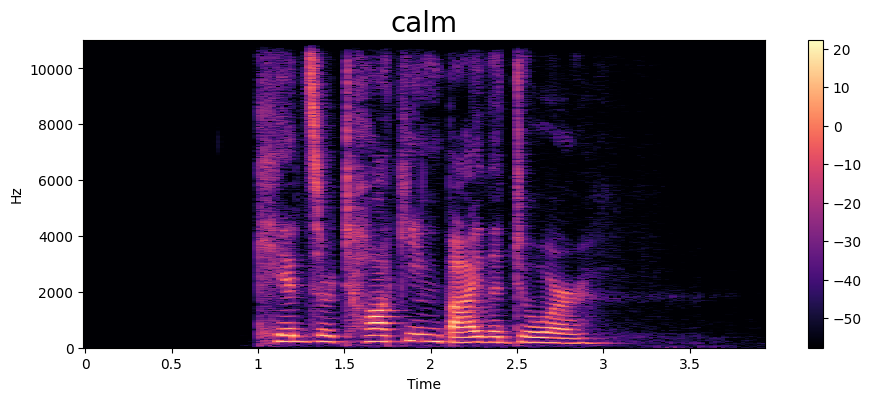

In [ ]:
emotion=emot[7]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [ ]:
#for providing more accurate values, the augmented data is to be fed to the neural network.
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data,rate=0.75)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.75):
    return librosa.effects.pitch_shift(data,sr=sampling_rate, n_steps=0.75) #sr and n_steps are syntax,dont change them

#just to check the augmentation techniques
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

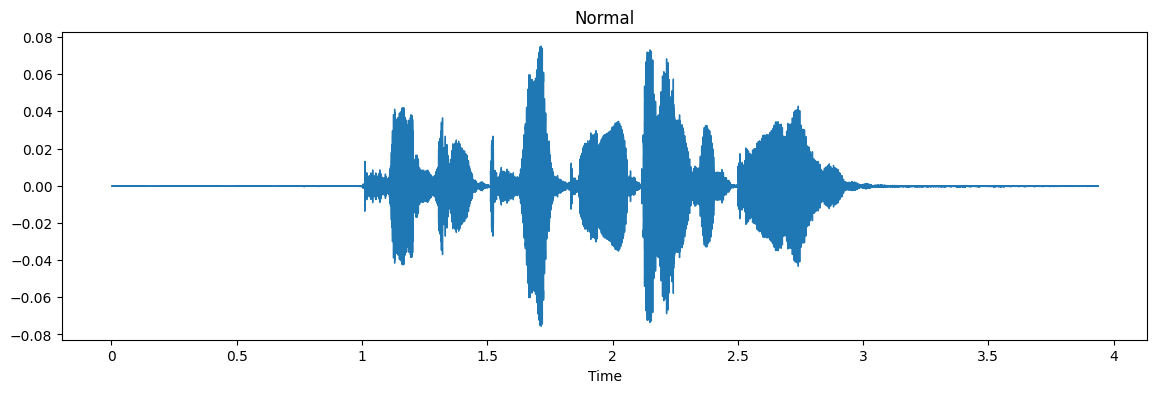

In [ ]:
# normal
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title("Normal")
Audio(path)

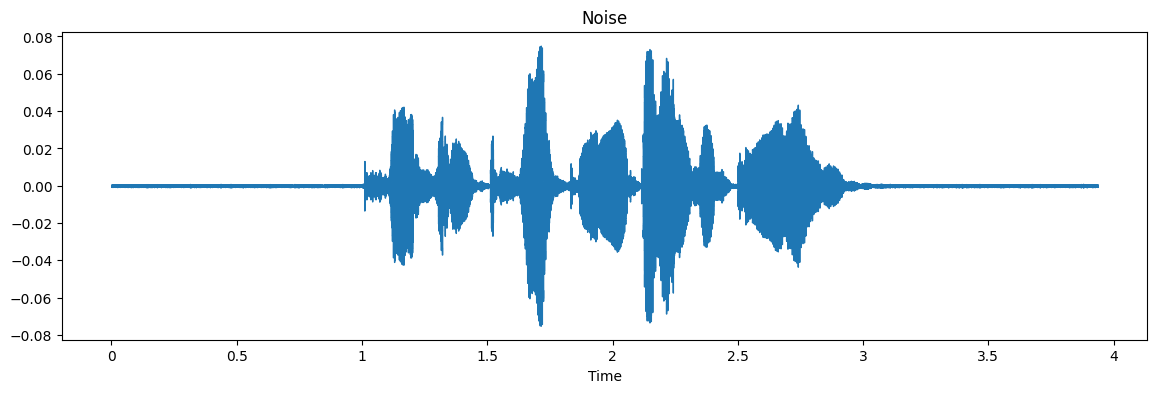

In [ ]:
# noise
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Noise")
Audio(x, rate=sample_rate)

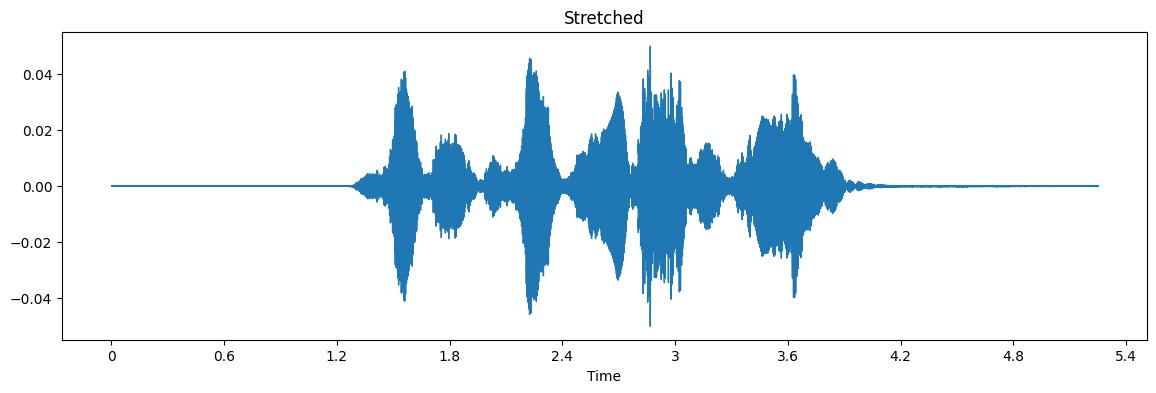

In [ ]:
# stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Stretched")
Audio(x, rate=sample_rate)

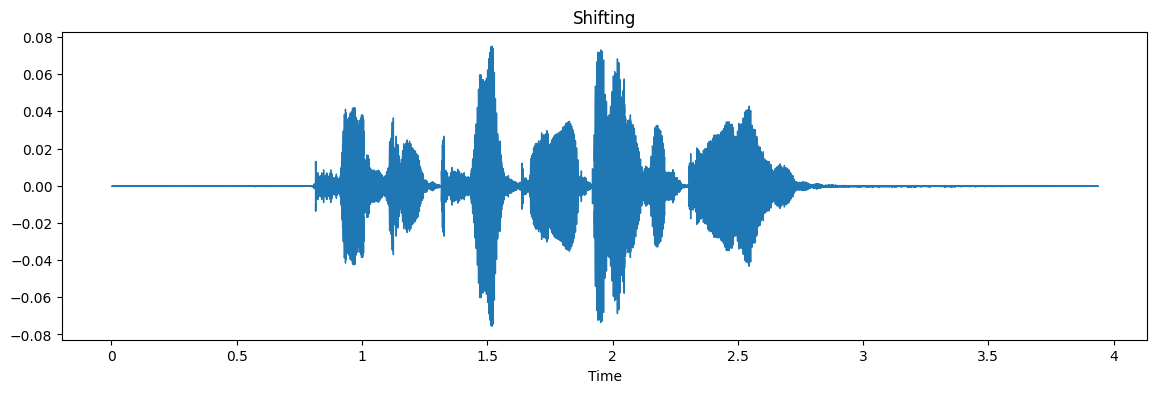

In [ ]:
# shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("Shifting")
Audio(x, rate=sample_rate)

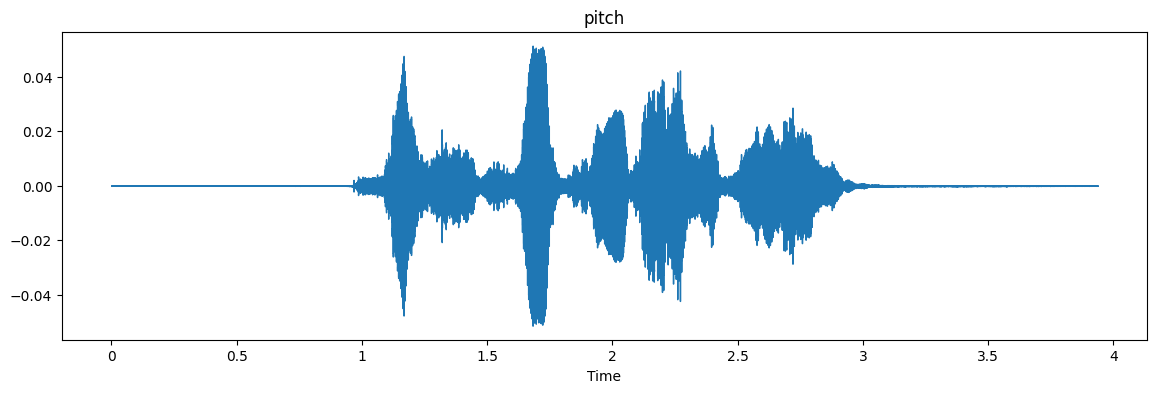

In [ ]:
# pitch
x = pitch(data,sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title("pitch")
Audio(x, rate=sample_rate)

In [ ]:
#Feature extraction
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result

def get_features(path):
    # duration and offset are used to take care of
#     the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))

    # stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))

    return result

In [ ]:
#interrupted the kernel as it takes several hours
X, Y = [], []

di=zip(df["Path"], df["Emotions"])
for path, emotion in di :
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [ ]:
len(X), len(Y), df["Path"].shape

(28086, 28086, (9362,))

In [ ]:
new_df = pd.DataFrame(X)
new_df['Emotions'] = Y
new_df.to_csv('dataframe.csv', index=False)
new_df.head()

0         1         2         3         4         5         6  \
0  0.197700  0.511812  0.482865  0.477522  0.449772  0.511466  0.546265   
1  0.307341  0.630242  0.621336  0.633970  0.622131  0.634795  0.633604   
2  0.174632  0.635645  0.538846  0.481875  0.515767  0.436640  0.468871   
3  0.188006  0.497199  0.518619  0.456564  0.499571  0.532390  0.516853   
4  0.216241  0.560914  0.590038  0.525486  0.546334  0.596967  0.560219   

          7         8         9  ...       153       154       155       156  \
0  0.544027  0.603586  0.577195  ...  0.000606  0.000360  0.000095  0.000126   
1  0.614511  0.690847  0.684624  ...  0.000672  0.000417  0.000155  0.000187   
2  0.549354  0.525080  0.616238  ...  0.000173  0.000073  0.000111  0.000052   
3  0.534857  0.521097  0.579855  ...  0.000448  0.000156  0.000249  0.000361   
4  0.582623  0.564112  0.596666  ...  0.000483  0.000191  0.000288  0.000398   

        157       158       159       160       161  Emotions  
0  0.000183  0.000219  0.000307  0.000184  0.000013       sad  
1  0.000242  0.000278  0.000369  0.000235  0.000068       sad  
2  0.000026  0.000033  0.000053  0.000025  0.000002       sad  
3  0.000316  0.000300  0.000222  0.000158  0.000014      calm  
4  0.000347  0.000333  0.000251  0.000195  0.000050      calm  

[5 rows x 163 columns]

In [ ]:
X = new_df.iloc[: ,:-1].values
Y = new_df['Emotions'].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20 , shuffle=True) #can reduce test size(testing proportion)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162), (22468, 8), (5618, 162), (5618, 8))

In [ ]:
from sklearn.preprocessing import StandardScaler
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162), (22468, 8), (5618, 162), (5618, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22468, 162, 1), (22468, 8), (5618, 162, 1), (5618, 8))

In [ ]:
# model

model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 160, 128)          512       
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 160, 128)          0         
 ng1D)                                                           
                                                                 
 conv1d_16 (Conv1D)          (None, 158, 256)          98560     
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 158, 256)          0         
 ng1D)                                                           
                                                                 
 conv1d_17 (Conv1D)          (None, 156, 512)          393728    
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 156, 512)        

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


es=EarlyStopping(monitor='val_accuracy',patience=3)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
model_22=model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test),callbacks=[rlrp,es])

Epoch 1/50
176/176 [==============================] - 38s 124ms/step - loss: 1.6468 - accuracy: 0.3321 - val_loss: 1.4606 - val_accuracy: 0.4160 - lr: 0.0010
Epoch 2/50
176/176 [==============================] - 22s 123ms/step - loss: 1.4479 - accuracy: 0.4291 - val_loss: 1.3624 - val_accuracy: 0.4486 - lr: 0.0010
Epoch 3/50
176/176 [==============================] - 22s 122ms/step - loss: 1.3154 - accuracy: 0.4813 - val_loss: 1.2560 - val_accuracy: 0.5068 - lr: 0.0010
Epoch 4/50
176/176 [==============================] - 21s 121ms/step - loss: 1.1862 - accuracy: 0.5420 - val_loss: 1.2254 - val_accuracy: 0.5153 - lr: 0.0010
Epoch 5/50
176/176 [==============================] - 21s 121ms/step - loss: 1.0348 - accuracy: 0.6038 - val_loss: 1.1685 - val_accuracy: 0.5514 - lr: 0.0010
Epoch 6/50
176/176 [==============================] - 20s 115ms/step - loss: 0.8704 - accuracy: 0.6742 - val_loss: 1.1305 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 7/50
176/176 [==============================] 

In [ ]:
num_epochs=21

703/703 [==============================] - 8s 11ms/step - loss: 0.0121 - accuracy: 0.9971
Training accuracy   99.71069693565369 %
176/176 [==============================] - 2s 12ms/step - loss: 1.9298 - accuracy: 0.6287
Testing accuracy   62.869346141815186 %


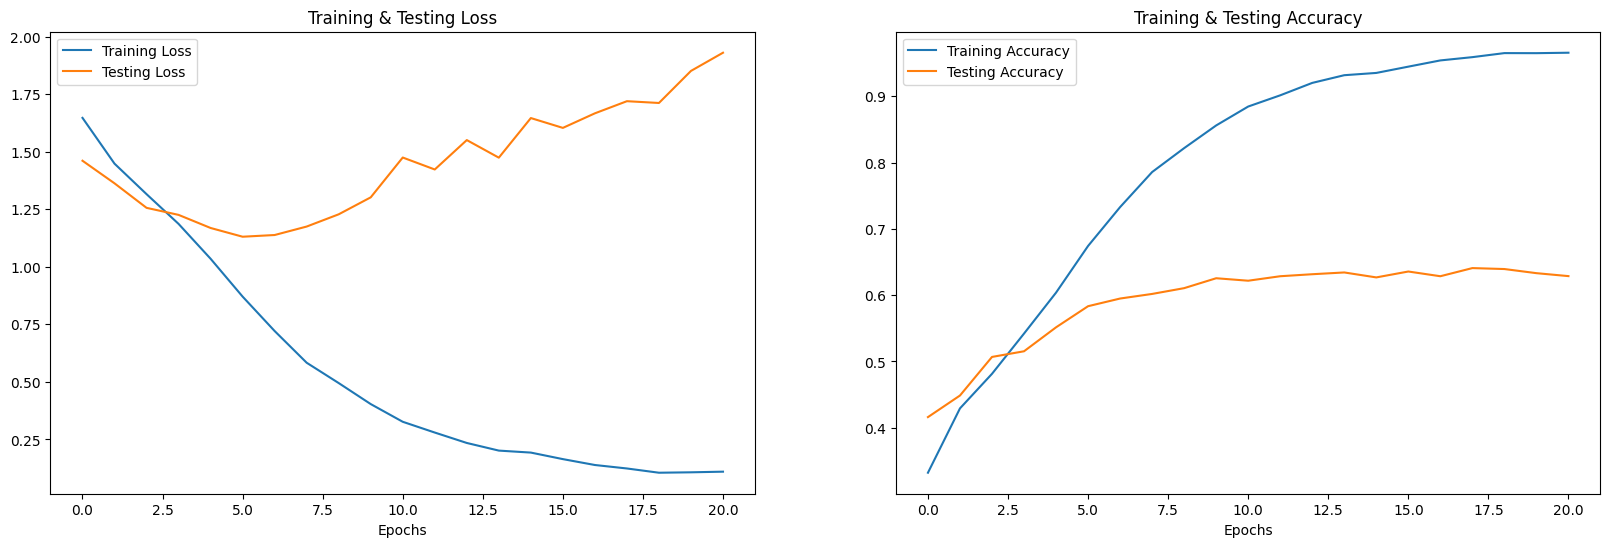

In [ ]:
print("Training accuracy  " , model.evaluate(x_train,y_train)[1]*100 , "%")

print("Testing accuracy  " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(num_epochs)]
fig , ax = plt.subplots(1,2)
train_acc = model_22.history['accuracy']
train_loss = model_22.history['loss']
test_acc = model_22.history['val_accuracy']
test_loss = model_22.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

176/176 [==============================] - 2s 12ms/step


In [ ]:
c_df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
c_df['Predicted Labels'] = y_pred.flatten()
c_df['Actual Labels'] = y_test.flatten()

In [ ]:
c_df.sample(10)

Predicted Labels Actual Labels
2444             fear         happy
1747            happy         happy
4289              sad           sad
246               sad     disgusted
965           neutral       neutral
738             angry         angry
5390            angry         happy
92            neutral       neutral
989         surprised     surprised
2130              sad           sad

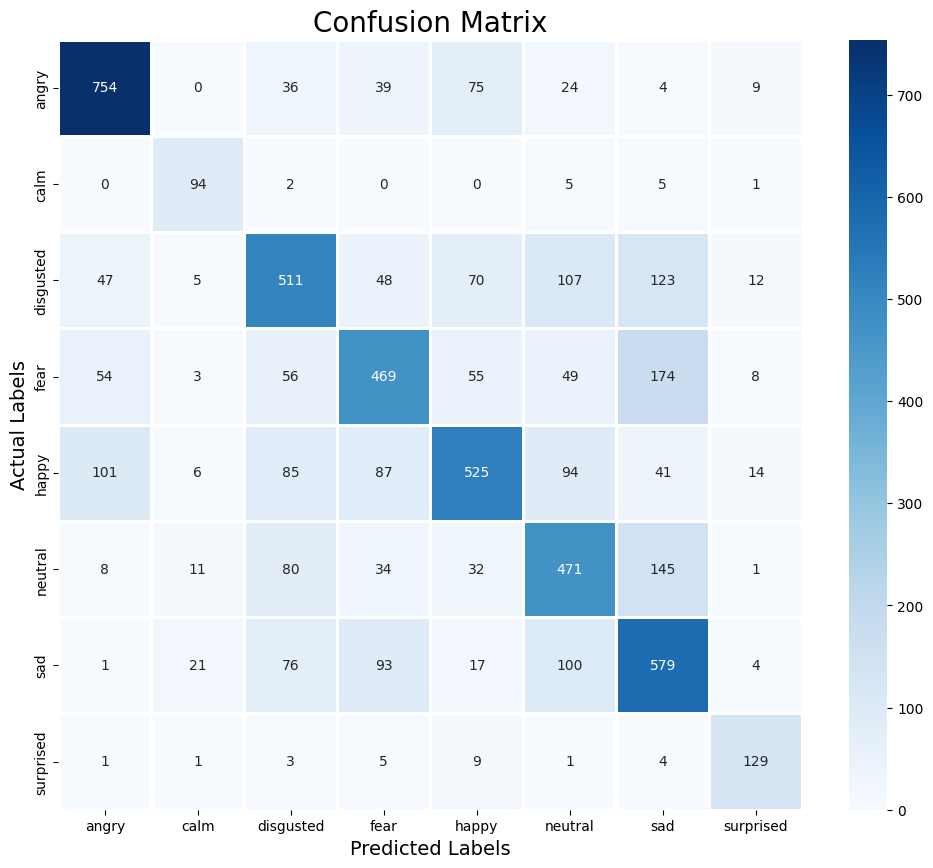

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.78      0.80      0.79       941
        calm       0.67      0.88      0.76       107
   disgusted       0.60      0.55      0.58       923
        fear       0.61      0.54      0.57       868
       happy       0.67      0.55      0.60       953
     neutral       0.55      0.60      0.58       782
         sad       0.54      0.65      0.59       891
   surprised       0.72      0.84      0.78       153

    accuracy                           0.63      5618
   macro avg       0.64      0.68      0.66      5618
weighted avg       0.63      0.63      0.63      5618

